# AI market trend analysis
 *This is a simple protoype for evluating future prediction of 'Apple Inc' stock.*
Importing the Reqired Libraries

In [34]:
import pandas as PD
import numpy as np
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model
import yfinance as yf

In [41]:
ticker = ["AAPL"]  #  Apple stock

# Download historical data for the specified period
start_date = "2013-01-01"
end_date = "2023-12-29"

# Fetch the data
da = yf.download(ticker, start=start_date, end=end_date)

# Save the data as a CSV file
da.to_csv("stock_data.csv")


[*********************100%%**********************]  1 of 1 completed


In [42]:
da.shape

(2767, 6)

In [43]:
da.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769098,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557430,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096226,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001549,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044609,458707200


In [44]:
da.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2767 entries, 2013-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2767 non-null   float64
 1   High       2767 non-null   float64
 2   Low        2767 non-null   float64
 3   Close      2767 non-null   float64
 4   Adj Close  2767 non-null   float64
 5   Volume     2767 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.3 KB


Since there are no-null values we can proceed further.This figure indicates the stock’s closing price on that particular day of stock market trading.

<Axes: xlabel='Date'>

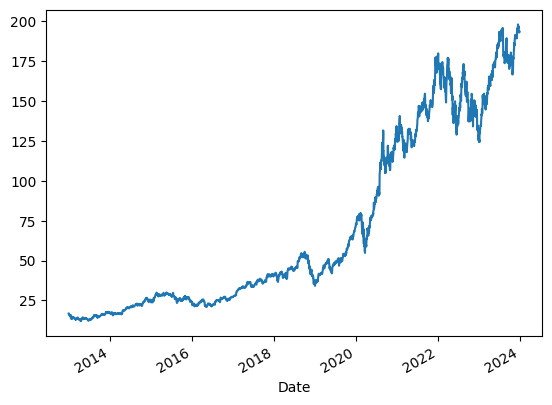

In [23]:
da['Adj Close'].plot()

In [24]:
#Set Target Variable
output_var = PD.DataFrame(da['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

To decrease the computational cost of the data in the table, we will scale the stock values to values between 0 and 1. As a result, all of the data in large numbers is reduced, and therefore memory consumption is decreased

In [25]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(da[features])

# Creating a DataFrame with the transformed features
feature_transform = pd.DataFrame(data=feature_transform, columns=features, index=da.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2013-01-02,0.032163,0.029944,0.030507,0.373377
2013-01-03,0.031011,0.028917,0.030385,0.228923
2013-01-04,0.028895,0.026789,0.027428,0.396912
2013-01-07,0.025992,0.024992,0.025356,0.320230
2013-01-08,0.027390,0.025491,0.026535,0.302518


To accomplish this, we will employ the TimeSeriesSplit class from the sci-kit-learn library. We will configure the number of splits to be 10, indicating that 10% of the data will serve as the test set, while the remaining 90% will train the LSTM model.

In [26]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match the format

In [27]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function

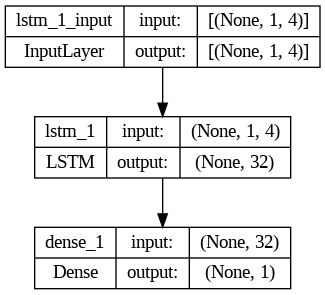

In [35]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

The Final Part: Predicting future values and repesentation of it

In [39]:
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 2ms/step


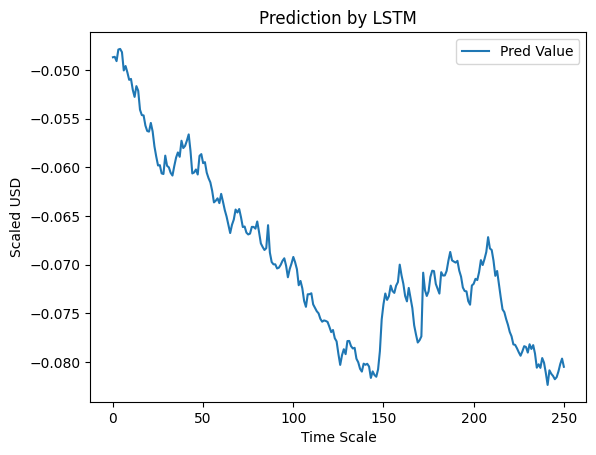

In [40]:
plt.plot(y_pred, label='Pred Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()